In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical  # Updated import
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

In [3]:
Crema_Path = '/content/drive/My Drive/Crema/'
Ravdess_Path = '/content/drive/My Drive/audio_speech_actors_01-24'
Savee_Path = '/content/drive/My Drive/Savee/'
Tess_Path = '/content/drive/My Drive/Tess/'

In [4]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                                          File_Path
0  disgust  /content/drive/My Drive/Crema//1079_TAI_DIS_XX...
1  neutral  /content/drive/My Drive/Crema//1079_ITH_NEU_XX...
2    happy  /content/drive/My Drive/Crema//1079_IWL_HAP_XX...
3      sad  /content/drive/My Drive/Crema//1079_TAI_SAD_XX...
4    happy  /content/drive/My Drive/Crema//1080_TSI_HAP_XX...

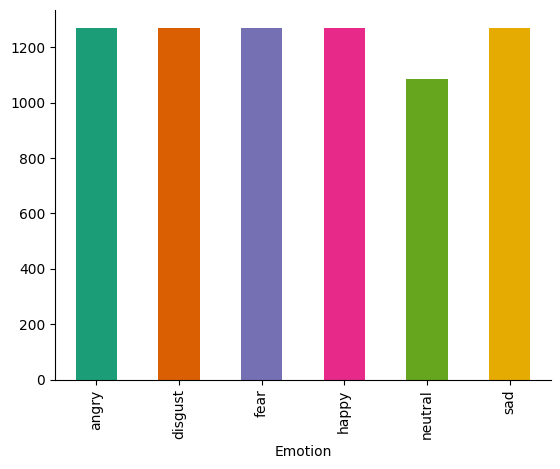

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
Crema_df.groupby('Emotion').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
Crema_df['Emotion'].unique()
Crema_df.shape[0]

7442

In [7]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

Emotion                                          File_Path
0     calm  /content/drive/My Drive/audio_speech_actors_01...
1  neutral  /content/drive/My Drive/audio_speech_actors_01...
2     calm  /content/drive/My Drive/audio_speech_actors_01...
3  neutral  /content/drive/My Drive/audio_speech_actors_01...
4  neutral  /content/drive/My Drive/audio_speech_actors_01...

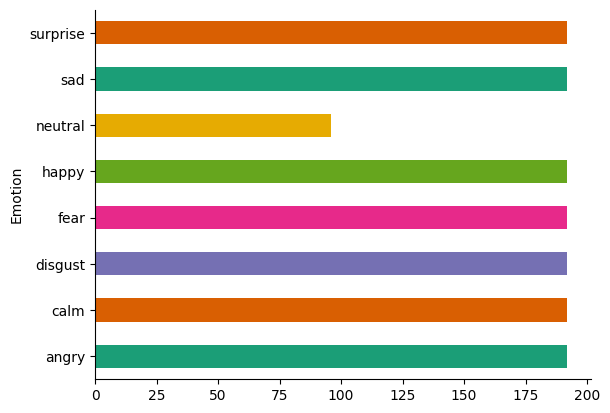

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
Ravdess_df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
Ravdess_df['Emotion'].unique()
Ravdess_df.shape[0]

1440

In [10]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                                  File_Path
0    angry  /content/drive/My Drive/Savee//DC_a03.wav
1    angry  /content/drive/My Drive/Savee//DC_a01.wav
2    angry  /content/drive/My Drive/Savee//DC_a06.wav
3  disgust  /content/drive/My Drive/Savee//DC_d08.wav
4    angry  /content/drive/My Drive/Savee//DC_a07.wav

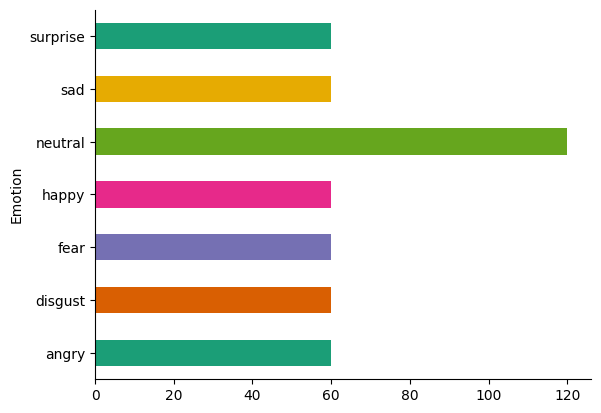

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
Savee_df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
Savee_df['Emotion'].unique()
Savee_df.shape[0]

480

In [13]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

Emotion                                          File_Path
0   happy  /content/drive/My Drive/Tess/OAF_happy/OAF_dod...
1   happy  /content/drive/My Drive/Tess/OAF_happy/OAF_boa...
2   happy  /content/drive/My Drive/Tess/OAF_happy/OAF_sei...
3   happy  /content/drive/My Drive/Tess/OAF_happy/OAF_lim...
4   happy  /content/drive/My Drive/Tess/OAF_happy/OAF_goa...

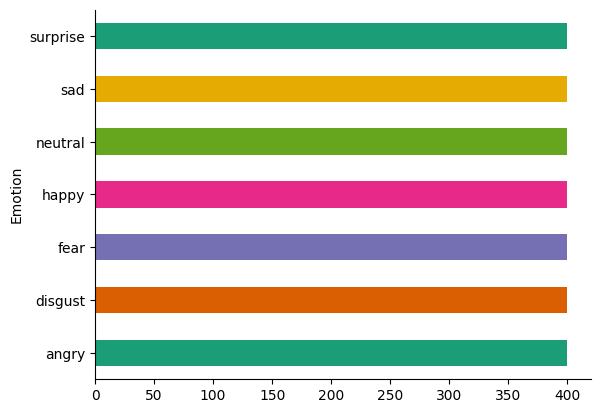

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
Tess_df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
Tess_df['Emotion'].unique()
Tess_df.shape[0]

2800

In [16]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [17]:
main_df.head()
main_df.tail(12162)

Emotion                                          File_Path
0     disgust  /content/drive/My Drive/Crema//1079_TAI_DIS_XX...
1     neutral  /content/drive/My Drive/Crema//1079_ITH_NEU_XX...
2       happy  /content/drive/My Drive/Crema//1079_IWL_HAP_XX...
3         sad  /content/drive/My Drive/Crema//1079_TAI_SAD_XX...
4       happy  /content/drive/My Drive/Crema//1080_TSI_HAP_XX...
...       ...                                                ...
2795      sad  /content/drive/My Drive/Tess/OAF_Sad/OAF_nag_s...
2796      sad  /content/drive/My Drive/Tess/OAF_Sad/OAF_void_...
2797      sad  /content/drive/My Drive/Tess/OAF_Sad/OAF_yes_s...
2798      sad  /content/drive/My Drive/Tess/OAF_Sad/OAF_love_...
2799      sad  /content/drive/My Drive/Tess/OAF_Sad/OAF_tool_...

[12162 rows x 2 columns]

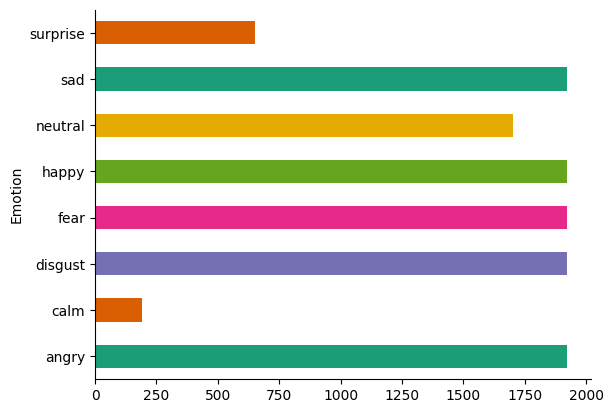

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
main_df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
emotion_names=main_df['Emotion'].unique()
print(emotion_names)
main_df.shape[1]

['disgust' 'neutral' 'happy' 'sad' 'fear' 'angry' 'calm' 'surprise']


2

In [20]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF','calm':'#2596BE'}

In [21]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'Waveplot for {emotion} emotion ',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [22]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'Spectogram for {emotion} emotion',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

Plotting graphs for: /content/drive/My Drive/Crema//1080_TIE_DIS_XX.wav
Plotting graphs for: /content/drive/My Drive/Crema//1079_DFA_NEU_XX.wav
Plotting graphs for: /content/drive/My Drive/Crema//1080_TSI_HAP_XX.wav
Plotting graphs for: /content/drive/My Drive/Crema//1080_IWL_SAD_XX.wav
Plotting graphs for: /content/drive/My Drive/Crema//1080_IOM_FEA_XX.wav
Plotting graphs for: /content/drive/My Drive/Crema//1080_MTI_ANG_XX.wav
Plotting graphs for: /content/drive/My Drive/audio_speech_actors_01-24/Actor_04/03-01-02-02-01-01-04.wav
Plotting graphs for: /content/drive/My Drive/audio_speech_actors_01-24/Actor_04/03-01-08-01-02-01-04.wav


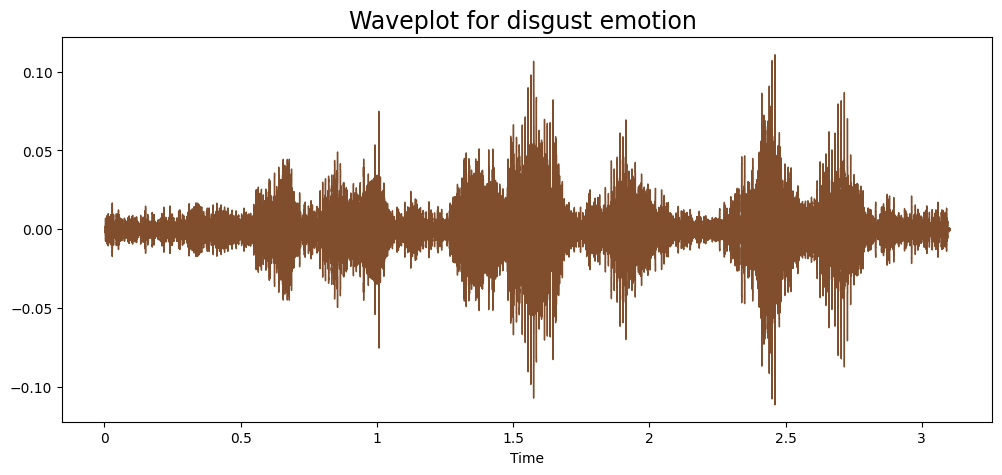

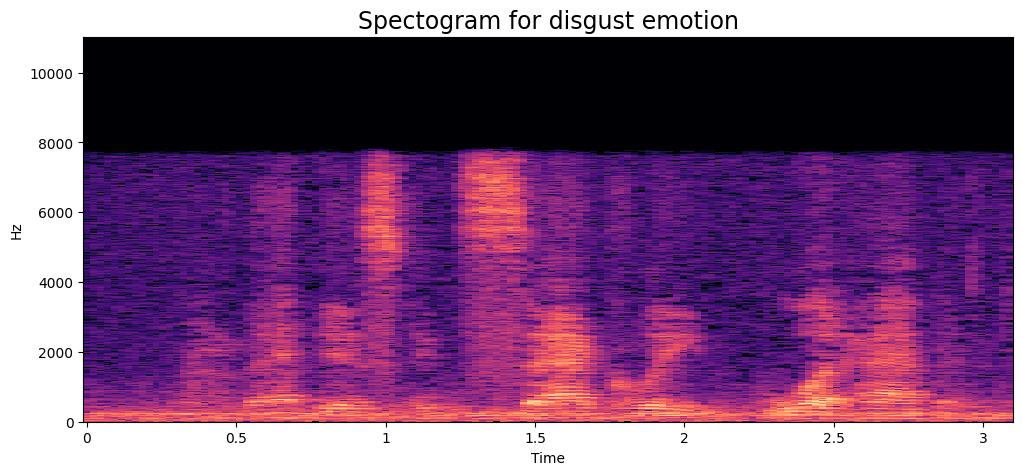

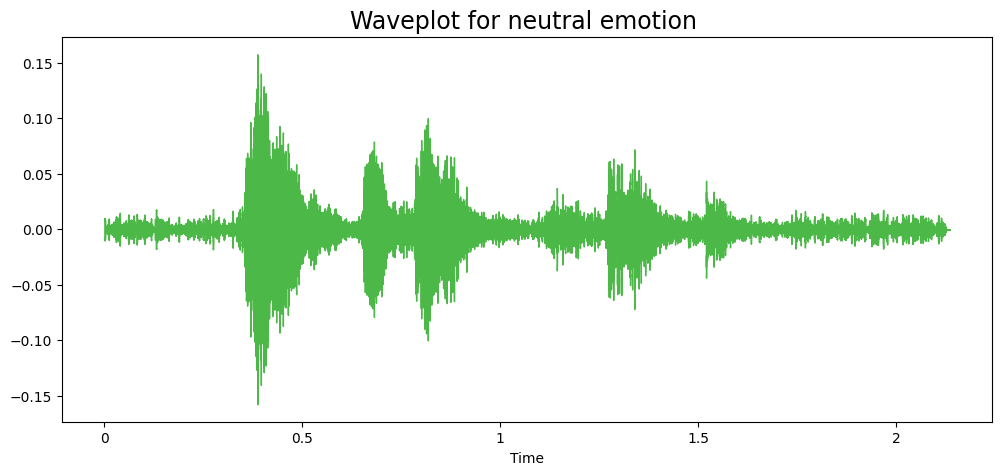

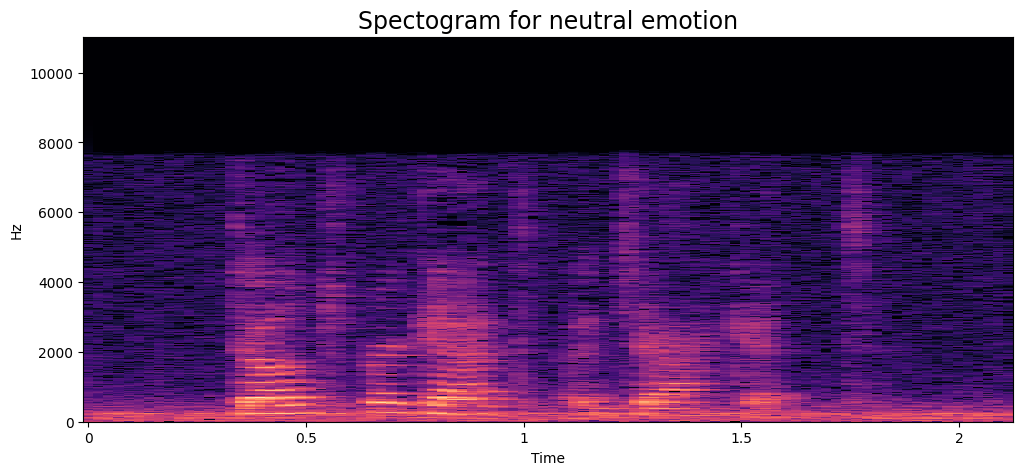

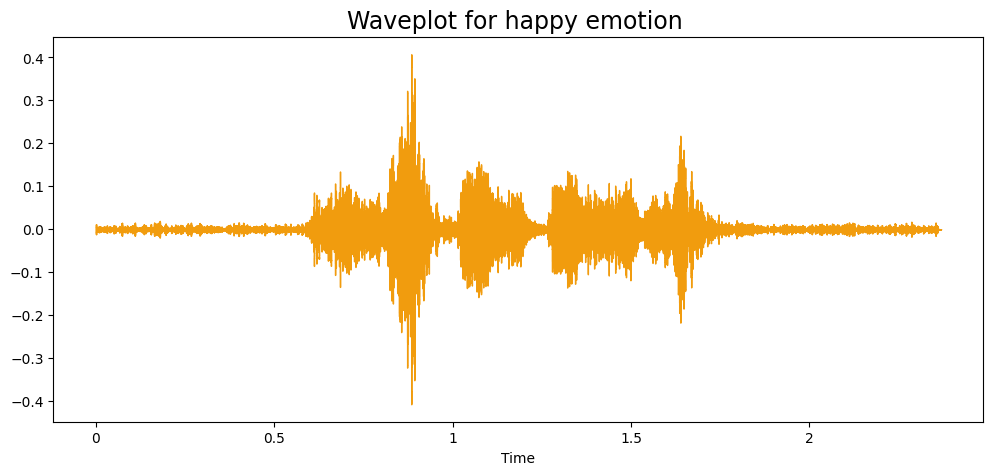

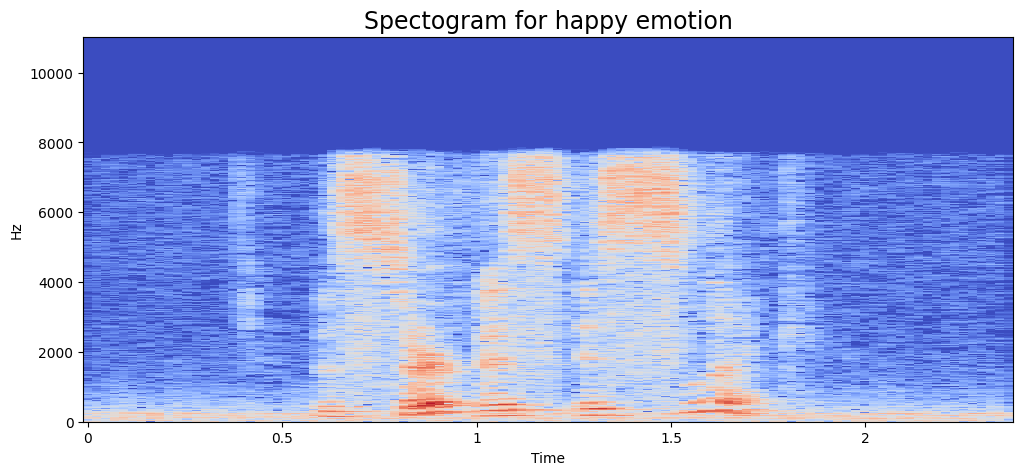

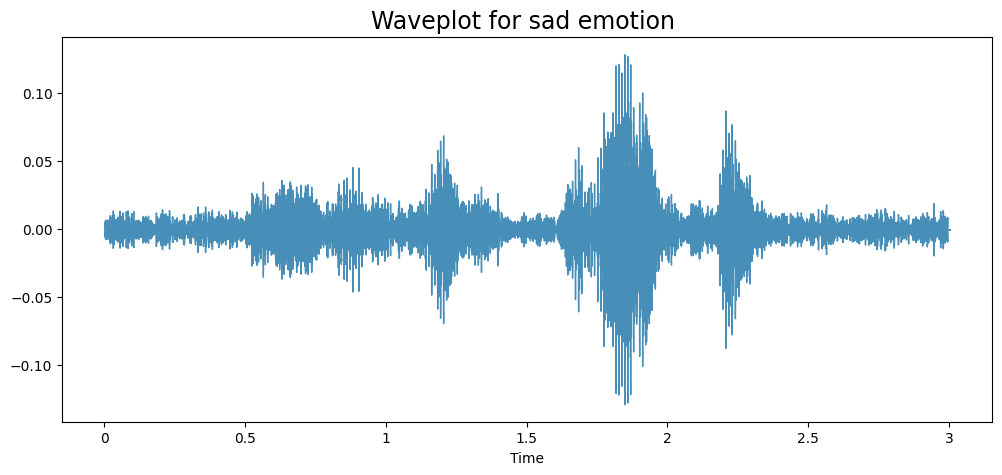

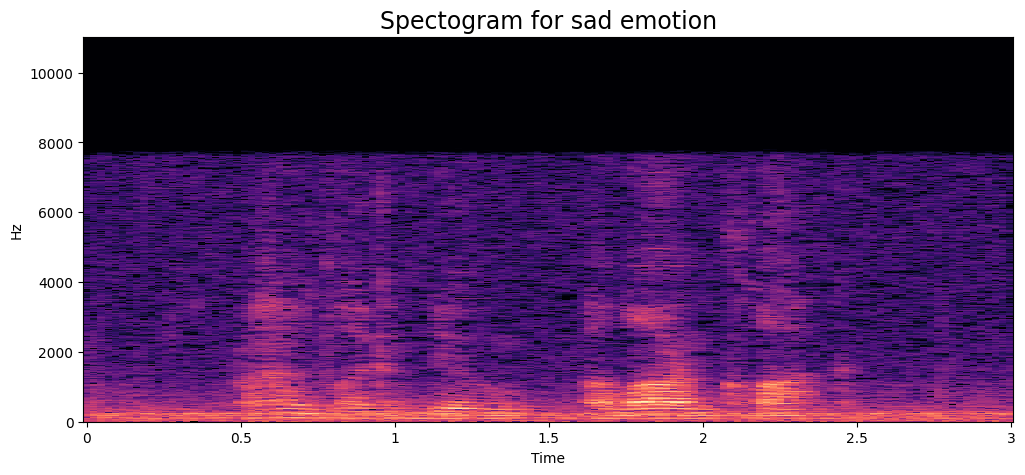

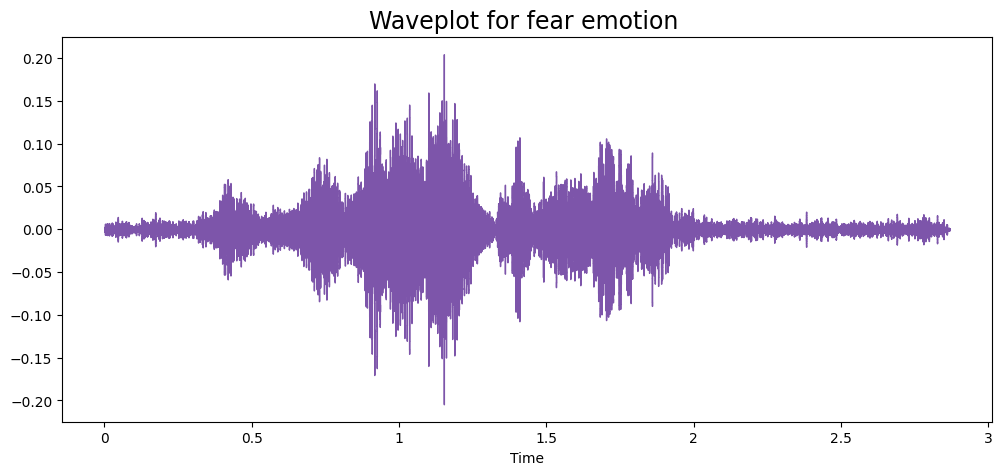

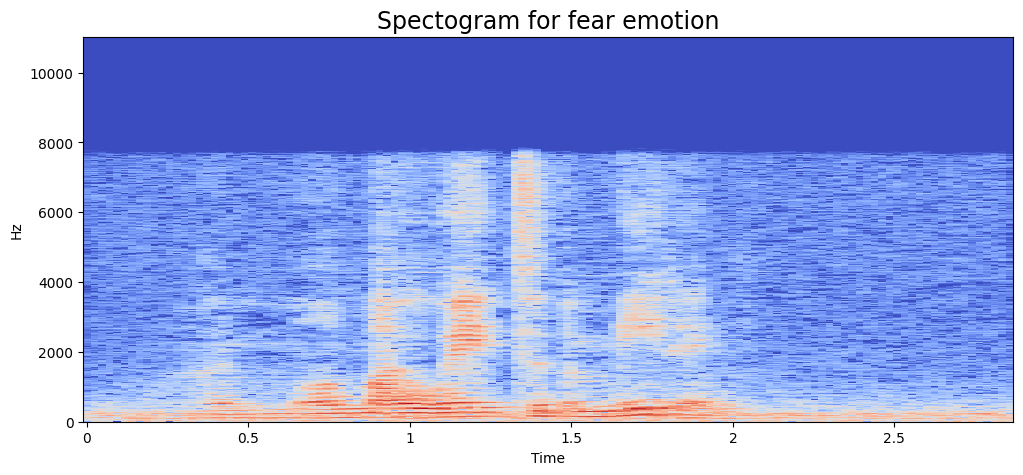

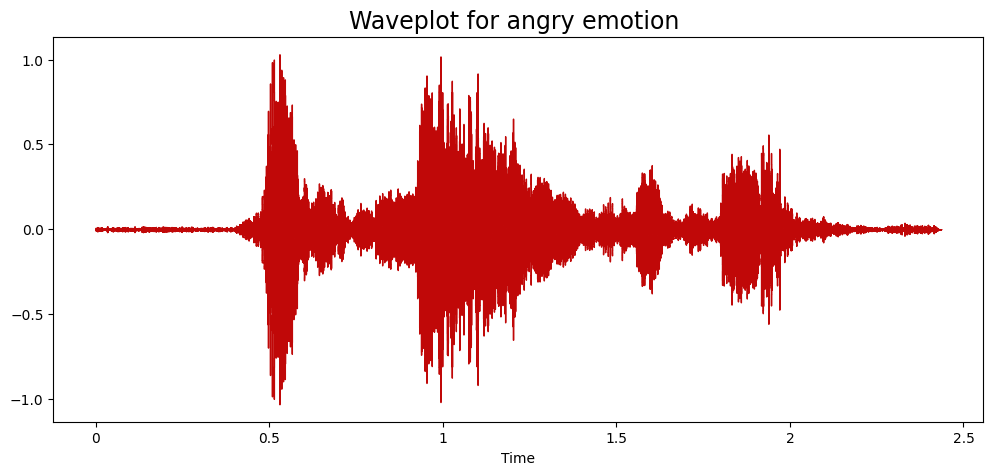

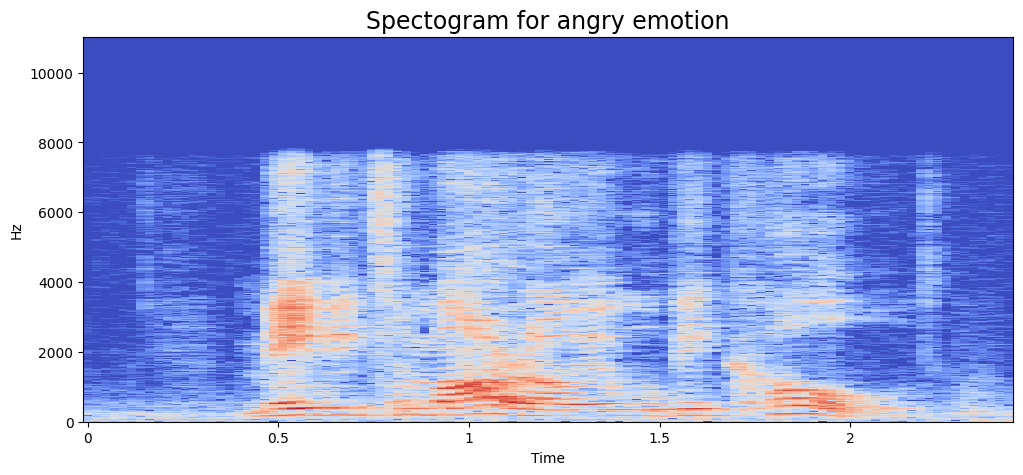

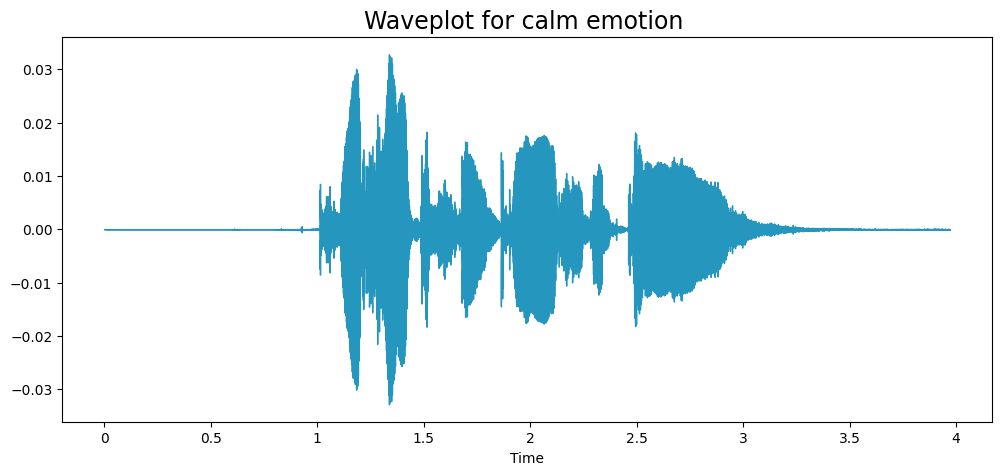

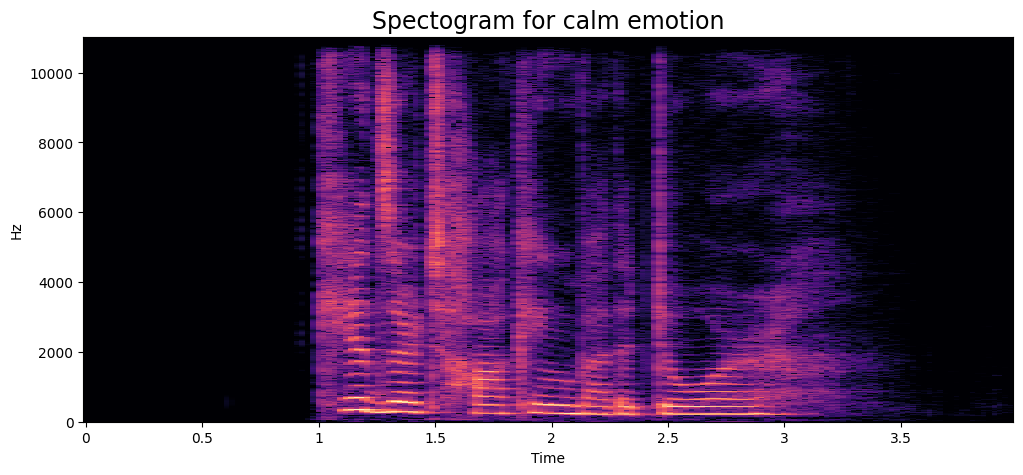

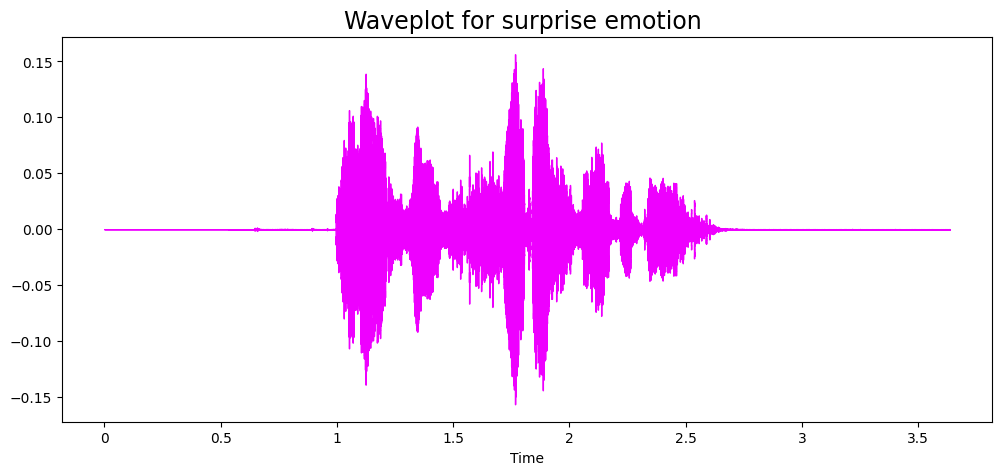

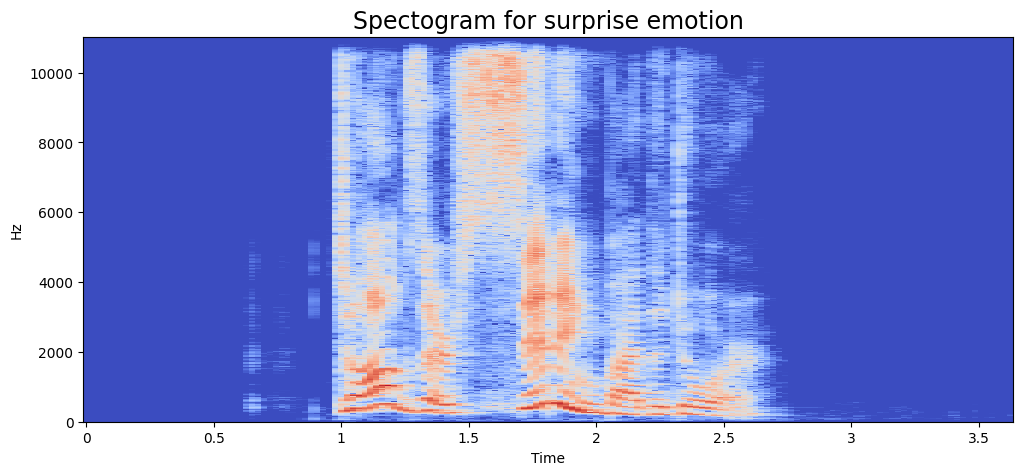

In [23]:
audio_path = []

for emotion in emotion_names:
    path = np.array(main_df['File_Path'][main_df['Emotion'] == emotion])[1]
    print(f"Plotting graphs for: {path}")

    data, sr = librosa.load(path)

    wave_plot(data, sr, emotion, colors[emotion])

    spectogram(data, sr, emotion)
    audio_path.append(path)

In [24]:
print(len(audio_path))

8


In [25]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[0])

Neutral Audio Sample



In [26]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[1])

Sad Audio Sample



In [27]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[2])

Disgust Audio Sample



In [28]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[3])

Angry Audio Sample



In [29]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [30]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[5])

Happy Audio Sample



In [31]:
print('Calm Audio Sample\n')
IPython.display.Audio(audio_path[6])

Calm Audio Sample



In [32]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[7])

Surprise Audio Sample



<a id="7"></a>
## Audio Augmentation

In [33]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data, sr, pitch_factor=0.7, random=False):
    if random:
        pitch_factor = np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=pitch_factor)


def stretching(data, rate=0.5):
    return librosa.effects.time_stretch(data,rate=0.5)

In [34]:
data,sr=librosa.load(audio_path[6])

<a id="4"></a>
### Orijinal Audio

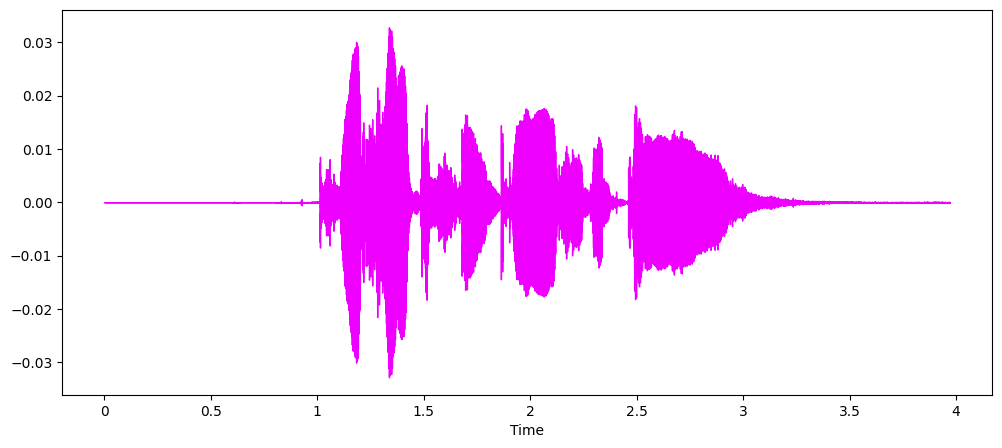

In [35]:
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr, color='#EE00FF')
IPython.display.Audio(audio_path[6])

<a id="8"></a>
### Noised Audio

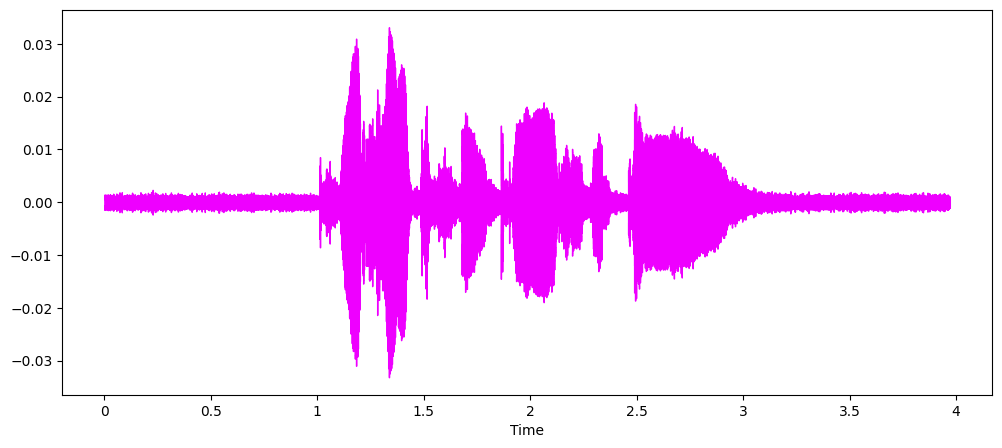

In [36]:
noised_audio=add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=noised_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(noised_audio,rate=sr)

<a id="10"></a>
### Streched Audio

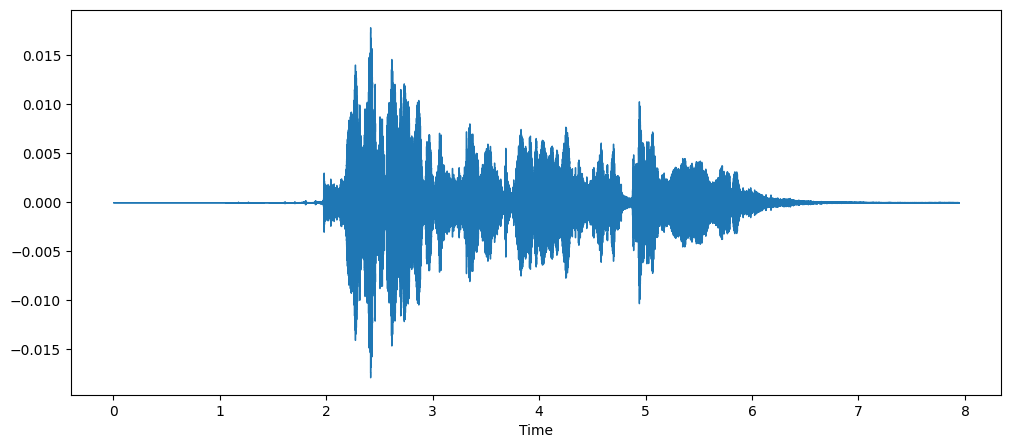

In [37]:
stretched_audio = stretching(data)

stretched_audio=stretching(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(stretched_audio,sr=sr)
IPython.display.Audio(stretched_audio,rate=sr)

<a id="11"></a>
### Shifted Audio

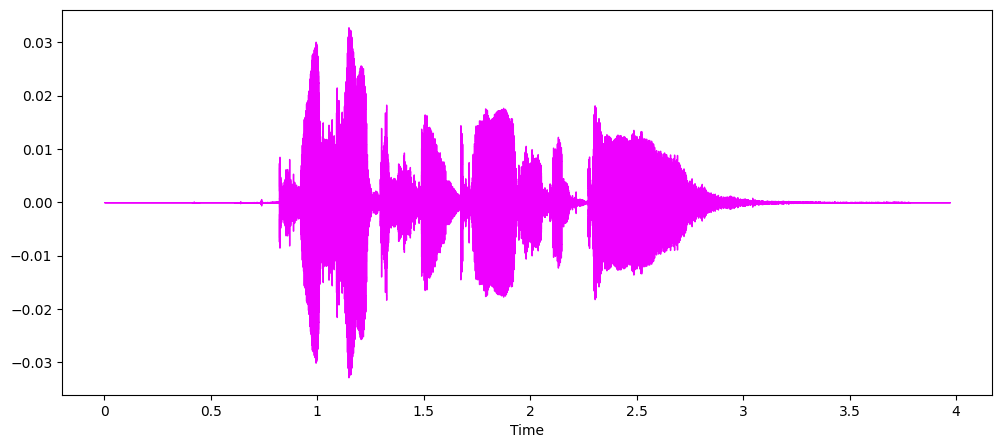

In [38]:
shifted_audio=shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(shifted_audio,rate=sr)

<a id="12"></a>
### Pitched Audio

Text(0.5, 1.0, 'Pitched Audio (Pitch Factor = 0.7)')

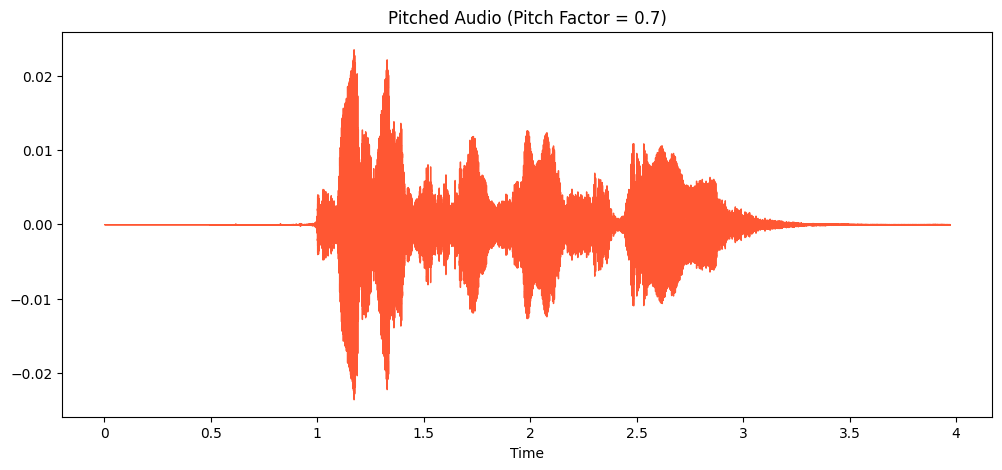

In [ ]:
pitched_audio = pitching(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(pitched_audio, sr=sr, color='#FF5733')
plt.title('Pitched Audio (Pitch Factor = 0.7)')


<a id="13"></a>
## Feature Extraction

In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse_values = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse_values)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result


def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)

    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))

    return audio

<a id="14"></a>
## Processing

In [ ]:
X, Y = [], []
for path, emotion, index in zip(main_df.File_Path, main_df.Emotion, range(main_df.File_Path.shape[0])):
    features = get_features(path)
    if index % 5 == 0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

0 audio has been processed
5 audio has been processed
10 audio has been processed
15 audio has been processed
20 audio has been processed
25 audio has been processed
30 audio has been processed
35 audio has been processed
40 audio has been processed
45 audio has been processed
50 audio has been processed
55 audio has been processed
60 audio has been processed
65 audio has been processed
70 audio has been processed
75 audio has been processed
80 audio has been processed
85 audio has been processed
90 audio has been processed
95 audio has been processed
100 audio has been processed
105 audio has been processed
110 audio has been processed
115 audio has been processed
120 audio has been processed
125 audio has been processed
130 audio has been processed
135 audio has been processed
140 audio has been processed
145 audio has been processed
150 audio has been processed
155 audio has been processed
160 audio has been processed
165 audio has been processed
170 audio has been processed
175 aud

In [42]:
len(Y[0])

7

In [43]:
processed_data_path='./processed_data.csv'

In [44]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)

In [45]:
extract.head(10)
extract.tail(10)

0         1         2         3         4         5         6  \
48638  0.020996  0.031738  0.042480  0.043457  0.042969  0.043457  0.040039   
48639  0.020996  0.031738  0.042480  0.043457  0.043457  0.043457  0.039062   
48640  0.018066  0.024414  0.029785  0.024902  0.022949  0.021484  0.020996   
48641  0.017090  0.023438  0.029785  0.025879  0.024902  0.023926  0.021973   
48642  0.017090  0.022949  0.028320  0.022949  0.021973  0.021484  0.021484   
48643  0.038574  0.058105  0.074219  0.065918  0.061035  0.057617  0.062500   
48644  0.018555  0.027832  0.037598  0.038086  0.038574  0.037109  0.040039   
48645  0.018555  0.027832  0.037598  0.038086  0.039551  0.039062  0.043945   
48646  0.019043  0.028809  0.039062  0.039551  0.038086  0.033203  0.029297   
48647  0.020020  0.029785  0.041504  0.046387  0.049316  0.046875  0.042969   

              7         8         9  ...  2367  2368  2369  2370  2371  2372  \
48638  0.034180  0.029297  0.023438  ...   NaN   NaN   NaN   NaN   NaN   NaN   
48639  0.033203  0.028320  0.022461  ...   NaN   NaN   NaN   NaN   NaN   NaN   
48640  0.021973  0.021973  0.021973  ...   NaN   NaN   NaN   NaN   NaN   NaN   
48641  0.021973  0.021973  0.021973  ...   NaN   NaN   NaN   NaN   NaN   NaN   
48642  0.021484  0.022461  0.028320  ...   NaN   NaN   NaN   NaN   NaN   NaN   
48643  0.074219  0.101562  0.126953  ...   NaN   NaN   NaN   NaN   NaN   NaN   
48644  0.042480  0.041504  0.041992  ...   NaN   NaN   NaN   NaN   NaN   NaN   
48645  0.047363  0.046387  0.047852  ...   NaN   NaN   NaN   NaN   NaN   NaN   
48646  0.024414  0.021484  0.027832  ...   NaN   NaN   NaN   NaN   NaN   NaN   
48647  0.037109  0.036621  0.066895  ...   NaN   NaN   NaN   NaN   NaN   NaN   

       2373  2374  2375  Emotion  
48638   NaN   NaN   NaN      sad  
48639   NaN   NaN   NaN      sad  
48640   NaN   NaN   NaN      sad  
48641   NaN   NaN   NaN      sad  
48642   NaN   NaN   NaN      sad  
48643   NaN   NaN   NaN      sad  
48644   NaN   NaN   NaN      sad  
48645   NaN   NaN   NaN      sad  
48646   NaN   NaN   NaN      sad  
48647   NaN   NaN   NaN      sad  

[10 rows x 2377 columns]

In [ ]:
calm_rows = extract[extract['Emotion'] == 'calm']

print(calm_rows.head())

              0         1         2         3         4         5         6  \
29768  0.327148  0.520508  0.713867  0.777344  0.677246  0.589355  0.454102   
29769  0.254395  0.378418  0.504395  0.503418  0.490234  0.494141  0.477051   
29770  0.204590  0.314453  0.416016  0.401855  0.361816  0.305176  0.283203   
29771  0.247559  0.365723  0.494141  0.497070  0.486328  0.464844  0.418457   
29776  0.167969  0.167969  0.167969  0.004883  0.000000  0.000000  0.000000   

              7         8         9  ...       2367      2368      2369  \
29768  0.370605  0.337402  0.344238  ...  -1.061518 -1.855670 -1.941224   
29769  0.479980  0.486328  0.477051  ...   2.006483 -2.144213  0.058289   
29770  0.279297  0.293457  0.322266  ...  -0.413211 -0.885789 -0.256740   
29771  0.411133  0.424316  0.455566  ...   1.990700  1.585589  3.423119   
29776  0.008789  0.241211  0.373047  ... -12.609936 -2.088007 -4.638242   

           2370      2371      2372      2373       2374      2375  Emotio

In [ ]:
unique_emotions = extract['Emotion'].unique()

print(f"Unique emotions: {unique_emotions}")
print(f"Number of unique emotions: {len(unique_emotions)}")

Unique emotions: ['disgust' 'neutral' 'happy' 'sad' 'fear' 'angry' 'calm' 'surprise']
Number of unique emotions: 8


<a id="15"></a>
# Including Analyzed Audio Features

In [49]:
df=pd.read_csv(processed_data_path)
df.shape

(48648, 2377)

In [50]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(48648, 2377)

In [51]:
df.head(10)

0         1         2         3         4         5         6  \
0  0.060547  0.083984  0.104492  0.084961  0.072266  0.069824  0.065430   
1  0.091797  0.127930  0.169922  0.137695  0.117188  0.116699  0.128418   
2  0.059570  0.081055  0.100586  0.085449  0.073242  0.078125  0.074219   
3  0.062988  0.086914  0.109375  0.093750  0.082520  0.083984  0.079102   
4  0.014648  0.032227  0.051758  0.054688  0.062012  0.059570  0.055664   
5  0.150391  0.216797  0.244141  0.191406  0.125488  0.087891  0.103516   
6  0.030273  0.068359  0.089844  0.098145  0.087402  0.068359  0.060547   
7  0.032227  0.071777  0.095215  0.101074  0.089355  0.071289  0.060059   
8  0.024902  0.045410  0.082031  0.113770  0.134277  0.132324  0.111816   
9  0.128906  0.162109  0.211426  0.173340  0.178223  0.188965  0.205566   

          7         8         9  ...  2367  2368  2369  2370  2371  2372  \
0  0.060059  0.056641  0.046875  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.179199  0.248047  0.290039  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.067871  0.064453  0.052246  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.072266  0.080566  0.090820  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.053711  0.049805  0.044922  ...   0.0   0.0   0.0   0.0   0.0   0.0   
5  0.117188  0.139160  0.149902  ...   0.0   0.0   0.0   0.0   0.0   0.0   
6  0.053223  0.052734  0.041016  ...   0.0   0.0   0.0   0.0   0.0   0.0   
7  0.057617  0.055664  0.045410  ...   0.0   0.0   0.0   0.0   0.0   0.0   
8  0.078613  0.068848  0.082520  ...   0.0   0.0   0.0   0.0   0.0   0.0   
9  0.244629  0.294434  0.315918  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   2373  2374  2375  Emotion  
0   0.0   0.0   0.0  disgust  
1   0.0   0.0   0.0  disgust  
2   0.0   0.0   0.0  disgust  
3   0.0   0.0   0.0  disgust  
4   0.0   0.0   0.0  neutral  
5   0.0   0.0   0.0  neutral  
6   0.0   0.0   0.0  neutral  
7   0.0   0.0   0.0  neutral  
8   0.0   0.0   0.0    happy  
9   0.0   0.0   0.0    happy  

[10 rows x 2377 columns]

<a id="16"></a>
# Processing Analyzed Data for Training

In [52]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical 

lb = LabelEncoder()
Y = to_categorical(lb.fit_transform(Y))

print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


<a id="17"></a>
## Train, Test and Validation Spliting

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38918, 2376), (9730, 2376), (38918, 8), (9730, 8))

In [55]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 8), (9730, 8), (3892, 8))

In [56]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 8), (9730, 8), (3892, 8))

In [57]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((35026, 2376, 1), (9730, 2376, 1), (3892, 2376, 1))

<a id="18"></a>
## Tuning for Training

In [58]:
early_stop=EarlyStopping(monitor='val_acc',mode='max',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [59]:
EPOCH=25
BATCH_SIZE=64

<a id="19"></a>
# Begin Training

In [60]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(8,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2376, 512)           │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2376, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1188, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1188, 512)           │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1188, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 594, 256)            │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 594, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 297, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 297, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 297, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 149, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 149, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,915,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,193,736 (27.44 MB)

 Trainable params: 7,189,384 (27.43 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [61]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 190s 305ms/step - accuracy: 0.4062 - loss: 1.6980 - val_accuracy: 0.4532 - val_loss: 1.4618 - learning_rate: 0.0010
Epoch 2/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 165s 268ms/step - accuracy: 0.5653 - loss: 1.1236 - val_accuracy: 0.5817 - val_loss: 1.0873 - learning_rate: 0.0010
Epoch 3/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 202s 267ms/step - accuracy: 0.6251 - loss: 0.9744 - val_accuracy: 0.6025 - val_loss: 1.0529 - learning_rate: 0.0010
Epoch 4/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 202s 267ms/step - accuracy: 0.6841 - loss: 0.8332 - val_accuracy: 0.6285 - val_loss: 0.9757 - learning_rate: 0.0010
Epoch 5/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 204s 271ms/step - accuracy: 0.7442 - loss: 0.6879 - val_accuracy: 0.6876 - val_loss: 0.8536 - learning_rate: 0.0010
Epoch 6/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 200s 267ms/step - accuracy: 0.8070 - loss: 0.5297 - val_accuracy: 0.7336 - val_loss: 0.7318 - learning_rate: 0.0010
Epoch 7/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 146s 266ms/step - accura

<a id="21"></a>
## Accuracy Charts

In [62]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()

<a id="22"></a>
## Loss Charts

In [63]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

<a id="24"></a>
# Testing Model and Test Results

In [64]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

305/305 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step


array([0, 0, 2, ..., 4, 4, 6])

In [66]:
print(y_pred[23:60])

[4 5 5 6 7 0 2 6 2 2 4 3 3 7 7 4 0 2 2 7 0 0 5 2 5 6 4 5 6 0 4 4 0 4 5 7 2]


In [67]:
y_check=np.argmax(y_test,axis=1)
y_check

array([0, 0, 5, ..., 4, 4, 6])

In [73]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.2678771913051605
Test Accuracy: 0.9338129758834839


<a id="25"></a>
## Confusion Matrix

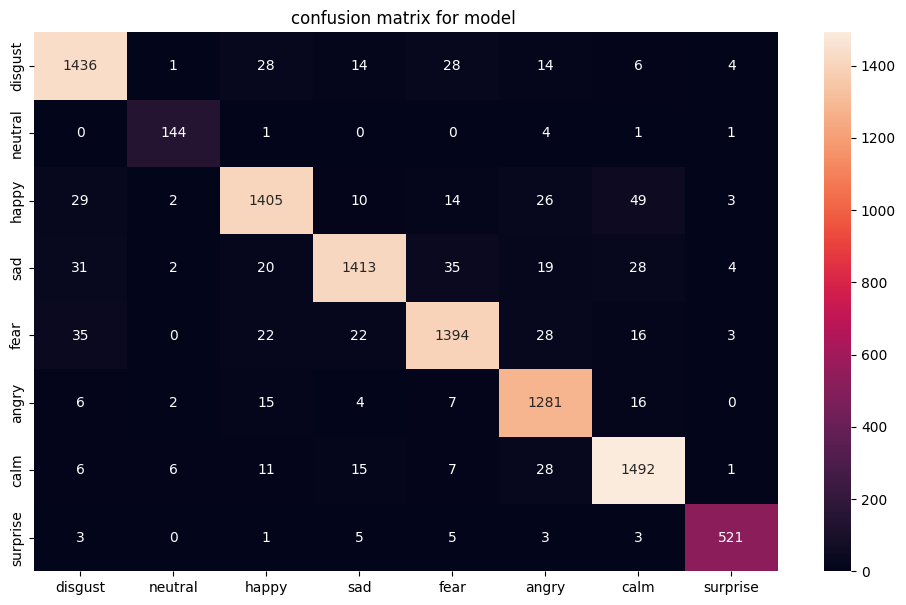

In [69]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [70]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

     disgust       0.93      0.94      0.93      1531
     neutral       0.92      0.95      0.94       151
       happy       0.93      0.91      0.92      1538
         sad       0.95      0.91      0.93      1552
        fear       0.94      0.92      0.93      1520
       angry       0.91      0.96      0.94      1331
        calm       0.93      0.95      0.94      1566
    surprise       0.97      0.96      0.97       541

    accuracy                           0.93      9730
   macro avg       0.93      0.94      0.94      9730
weighted avg       0.93      0.93      0.93      9730



In [72]:
model_path = "./res_model.keras"
model.save(model_path)